In [1]:
# NN-Tools
import numpy as np
import keras
# Visualization
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
# Printing
from sympy import *
init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# XOR data set
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
display(Matrix(X))
Y = np.array([0,1,1,0])
display(Matrix(Y))

⎡-1  -1⎤
⎢      ⎥
⎢-1  1 ⎥
⎢      ⎥
⎢1   -1⎥
⎢      ⎥
⎣1   1 ⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [3]:
# Multi-layer net with tanh hidden layer
# Start a new, empty model
model = keras.models.Sequential()
# Create the hidden layer (size 2), but also ensure it is
# densely connected to an input layer of size 2 (input_dim=2).
# These are then added to the model...
model.add(keras.layers.Dense(2,input_dim=2,activation='tanh'))
# Add another densely connected layer, our output layer,
# which is assumed to be connected to the -previous layer-
# added to the model (the hidden layer in our case).
model.add(keras.layers.Dense(1,activation='sigmoid'))
# Compile it and use the correct loss function (BCE) and
# a good optimizer (to avoid slow convergence when possible).
model.compile(loss='binary_crossentropy',optimizer='adam')
# Print the resulting model to observe its structure and
# number of parameters.
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# Print the weights!
for i in model.get_weights():
    display(Matrix(i))

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


⎡-0.0376374  0.213883 ⎤
⎢                     ⎥
⎣-0.0296662  -0.883078⎦

⎡0.0⎤
⎢   ⎥
⎣0.0⎦

⎡-0.434261⎤
⎢         ⎥
⎣-0.263874⎦

[0.0]

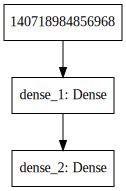

In [5]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

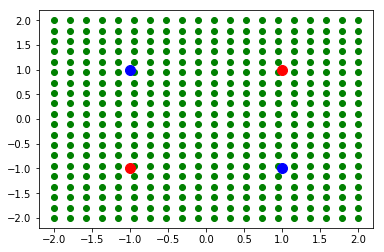

In [6]:
# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T
# Green grid points where we will evaluate the network
# outputs.
plt.plot(positions[:,0],positions[:,1],'go')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

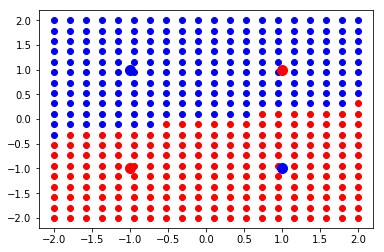

In [7]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()


In [8]:
# Train it!
history = model.fit(X, Y,
    batch_size=1,
    epochs=3000,
    verbose=0)

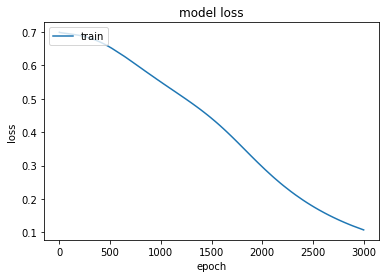

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


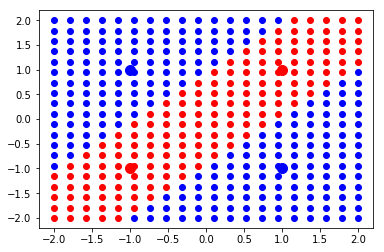

In [10]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [11]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()

# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
    bias_initializer=keras.initializers.Constant(0.1)))

# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))

# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
model.compile(loss='binary_crossentropy',optimizer='adam')

# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
for i in model.get_weights():
    display(Matrix(i))

⎡-0.812319  0.700097 ⎤
⎢                    ⎥
⎣0.072053   0.0966244⎦

⎡0.1⎤
⎢   ⎥
⎣0.1⎦

⎡-0.547959 ⎤
⎢          ⎥
⎣-0.0239198⎦

[0.0]

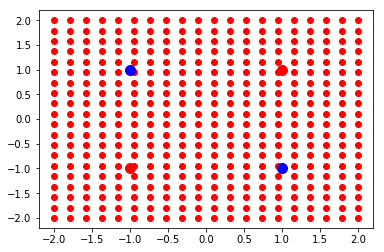

In [13]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)

# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)

plt.show()

In [ ]:
history = model.fit(X,Y,
                   batch_size = 1,
                   epochs = 1000,
                   verbose =0)

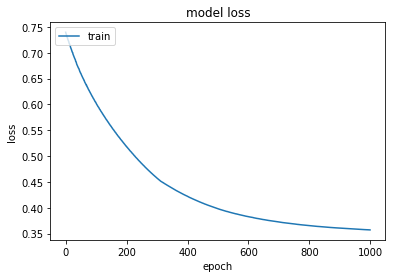

In [109]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

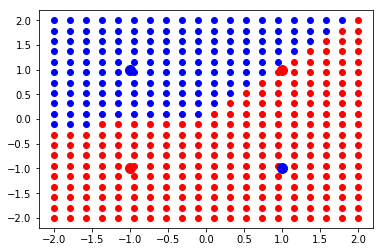

In [110]:
# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.show()

In [92]:
from keras.datasets import mnist
# Digits are zero through nine, so 10 classes
num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [95]:
model = keras.models.Sequential()
# Linear
model.add(keras.layers.Dense(num_classes, activation='softmax',input_shape=[x_train.shape[1]]))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Train it!
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=30,
    verbose=0,
    validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2641737094849348
Test accuracy: 0.9275


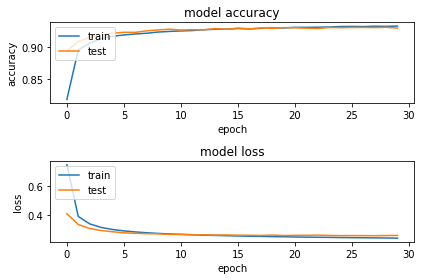

In [97]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [98]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2641737094849348
Test accuracy: 0.9275
